In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [15]:
Train_data = pd.read_csv('./datalab/used_car_train_20200313.csv', sep=' ')
TestB_data = pd.read_csv('./datalab/used_car_testB_20200421.csv', sep=' ')

In [3]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [4]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [5]:
numerical_cols = Train_data.select_dtypes(exclude='object').columns
numerical_cols

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [6]:
categorical_cols = Train_data.select_dtypes(include='object').columns
categorical_cols

Index(['notRepairedDamage'], dtype='object')

In [12]:
Train_data['fuelType'].value_counts()

0.0    91656
1.0    46991
2.0     2212
3.0      262
4.0      118
5.0       45
6.0       36
Name: fuelType, dtype: int64

In [19]:
feature_cols = [col for col in numerical_cols if col not in ['SaleID', 'name', 'regDate','creatDate','price']]
feature_cols  = [col for col in feature_cols if 'Type' not in col]
feature_cols #排掉名称、日期、以及一些type类别数据

['model',
 'brand',
 'gearbox',
 'power',
 'kilometer',
 'regionCode',
 'seller',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [20]:
X_data = Train_data[feature_cols]
Y_data = Train_data['price']
X_test = TestB_data[feature_cols]
print('X train shape:', X_data.shape)

X train shape: (150000, 22)


In [ ]:
data = pd.concat([X_data,X_test],axis=0,ignore_index=True)

In [27]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
reduce_mem_usage(data)

In [ ]:
train = data[:150000].copy()
train

In [21]:
def Sta_inf(data):
    print('_min',np. min(data))
    print('_max', np.max(data))
    print('_mean', np.mean(data))
    print('_ptp', np.ptp(data))
    print('_std', np.std(data))
    print('_var', np.var(data))
    

In [22]:
Sta_inf(Y_data)

_min 11
_max 99999
_mean 5923.327333333334
_ptp 99988
_std 7501.973469876438
_var 56279605.94272992


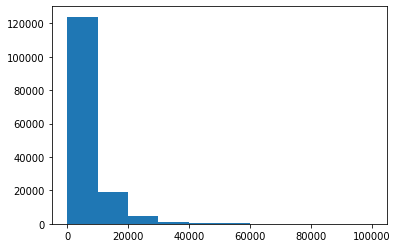

In [23]:
plt.hist(Y_data)
plt.show()
plt.close()

In [24]:
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)

In [26]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import lightgbm as lgb
import xgboost as xgb


In [ ]:
from sklearn.tree import 

In [ ]:
models = dict()
for model in models:
    scores = cross_val_score(model,X = X_TRAIN,y= y_train, verbose = 0,scoring=make_scorer(mean_suqared_error))
    result[model_name] = scores
result = pd.DataFrame(result)
result.index = ['cv'+ str(x) for x in range(1,6)]


In [ ]:
from bayes_opt import BayesianOptimization


In [ ]:
def rf_cv(n_estimators,num_leaves,max_depth,subsample,min_child_samples):
    val = cross_val_score(
        LGBMRegressor(objective = 'regression_l1',
            n_estimators=int(n_estimators),
            num_leaves=int(num_leaves),
            max_depth=int(max_depth),
            subsample = subsample,
            min_child_samples = int(min_child_samples)
            ),
        X
            
    ).mean()
    return 1-val


In [ ]:
rf_bo = b(
rf_cv,
{'':()})